<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-изучение-файлов" data-toc-modified-id="Загрузка-и-изучение-файлов-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка и изучение файлов</a></span></li><li><span><a href="#Проверка-расчета-эффективность-обогащения" data-toc-modified-id="Проверка-расчета-эффективность-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка расчета эффективность обогащения</a></span></li><li><span><a href="#Анализ-недоступных-в-тестовой-выборке-признаков" data-toc-modified-id="Анализ-недоступных-в-тестовой-выборке-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ недоступных в тестовой выборке признаков</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов-на-разных-этапах-очистки" data-toc-modified-id="Концентрация-металлов-на-разных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация металлов на разных этапах очистки</a></span></li><li><span><a href="#Распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределения размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Cуммарная-концентрация-всех-веществ-на-разных-стадиях" data-toc-modified-id="Cуммарная-концентрация-всех-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Cуммарная концентрация всех веществ на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Выбор-модели-для-чернового-концентрата" data-toc-modified-id="Выбор-модели-для-чернового-концентрата-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выбор модели для чернового концентрата</a></span></li><li><span><a href="#Выбор-модели-для-финального-концентрата" data-toc-modified-id="Выбор-модели-для-финального-концентрата-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Выбор модели для финального концентрата</a></span></li><li><span><a href="#Прогнозирование-эффективности" data-toc-modified-id="Прогнозирование-эффективности-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Прогнозирование эффективности</a></span></li><li><span><a href="#Итоговый-sMAPE" data-toc-modified-id="Итоговый-sMAPE-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Итоговый sMAPE</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Загрузка и изучение файлов

Начинаем исследование с импорта необходимых библиотек и написания функций, которые будут поясняться далее!

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# sklearn
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor

In [12]:
# функция для преобработки
def preparation(data):
    # переводим нужные данные в datetime
    data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d %H:%M:%S')
    # делаем дату индексом
    data.index = data['date']
    data = data.drop(['date'], axis = 1)
    # заполняем пропуски следующим значением
    for i in data.columns:
        data[i] = data[i].fillna(method = 'bfill')
    # удаляем дубликаты
    data = data.drop_duplicates()
    return data

# функция для визуализации концентраций элементов
def concentration(metall):
    plt.figure(figsize=(20,10))
    plt.hist(gold_recovery_full['rougher.input.feed_' + metall],
             bins = 20, color = 'blue', label = 'first input', alpha = .7)
    plt.hist(gold_recovery_full['rougher.output.concentrate_' + metall],
             bins = 20, color = 'red', label = 'rougher output', alpha = .7)
    plt.hist(gold_recovery_full['primary_cleaner.output.concentrate_' + metall],
             bins = 20, color = 'yellow', label = 'primary output', alpha = .7)
    plt.hist(gold_recovery_full['final.output.concentrate_' + metall],
             bins = 20, color = 'green', label = 'final', alpha = .7)
    plt.legend(loc = 'upper right')
    plt.title(metall.upper() + ' concentration')
    plt.xlabel('Размер гранул сырья')
    plt.ylabel('Количество наблюдений')
    plt.show()

# функция для расчета smape
def smape(true, preds):
    preds = np.clip(preds, 10**-10, 10**10)
    true = np.clip(true, 10**-10, 10**10)
    return 1 / len(preds) * np.sum(2 * np.abs(preds - true) / (np.abs(preds) + np.abs(true)))

# функция для расчета итогового smape
def itog_smape(smape_rough, smape_final):
    return 0.25 * smape_rough + 0.75 * smape_final

In [5]:
# загружаем данные
try:
    gold_recovery_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    gold_recovery_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    gold_recovery_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
except:
    gold_recovery_train = pd.read_csv('C:/Users/pashu/Downloads/gold_industry_train.csv')
    gold_recovery_test = pd.read_csv('C:/Users/pashu/Downloads/gold_industry_test.csv')
    gold_recovery_full = pd.read_csv('C:/Users/pashu/Downloads/gold_industry_full.csv')

Для того, чтобы ознакомиться с данными, изучаем пять строк из каждого датасета

In [6]:
gold_recovery_full.head(5)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [7]:
gold_recovery_test.head(5)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805


In [8]:
gold_recovery_train.head(5)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


### Проверка расчета эффективности обогащения

In [9]:
# проверяем в ручную коэф. обогащения 

C = gold_recovery_train['rougher.output.concentrate_au']
F = gold_recovery_train['rougher.input.feed_au']
T = gold_recovery_train['rougher.output.tail_au']

gold_recovery_train['rougher.output.recovery_2'] = (C * (F - T)) / (F * (C - T)) * 100

mean_absolute_error(gold_recovery_train['rougher.output.recovery'], gold_recovery_train['rougher.output.recovery_2'])

9.83758577644259e-15

При проверке выяснилось, что наши расчеты отличаются на крайне малую величину из-за особенностей языка, что подтвержает правильность имеющихся расчетов обогащения.

### Анализ недоступных в тестовой выборке признаков

Для того, чтобы узнать, какие признаки отсутсвуют в тестовой выборке, смотрим на названия стоблцов в двух датасетах: полном и тестовом.

In [10]:
gold_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

In [11]:
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


Выяснилось, что в тестовом датасете отсутсвуют параметры, которые могут быть известны только __после__ производственного этапа, а значит будут являться __помехой__ для модели. Так же отсутствуют таргетовые переменные соотвественно. В нашем распоряжение в тестовом датасете данные, в которых указаны параметры входа и параметры, характеризующие текущее состояние этапа.

### Предобработка данных

Предобработку данных мы выполняем функцией, в которых мы приводит столбец 'date' к правильному типы данных, а так же уставливаем его как индекс для наших датасетов. Далее мы заполняем пропуски в каждом столбце медианным значением этого же столбца и отбрасываем дубликаты. 

In [17]:
gold_recovery_train_new = preparation(gold_recovery_train)
gold_recovery_test_new = preparation(gold_recovery_test)
gold_recovery_full_new = preparation(gold_recovery_full)

## Анализ данных

### Концентрация металлов на разных этапах очистки

Далее мы исследуем концетрацию трех металлов (золото, серебро и свинец) на трех этапах. Для этого мы берем медианное значение по каждому из этапов для каждого металла.

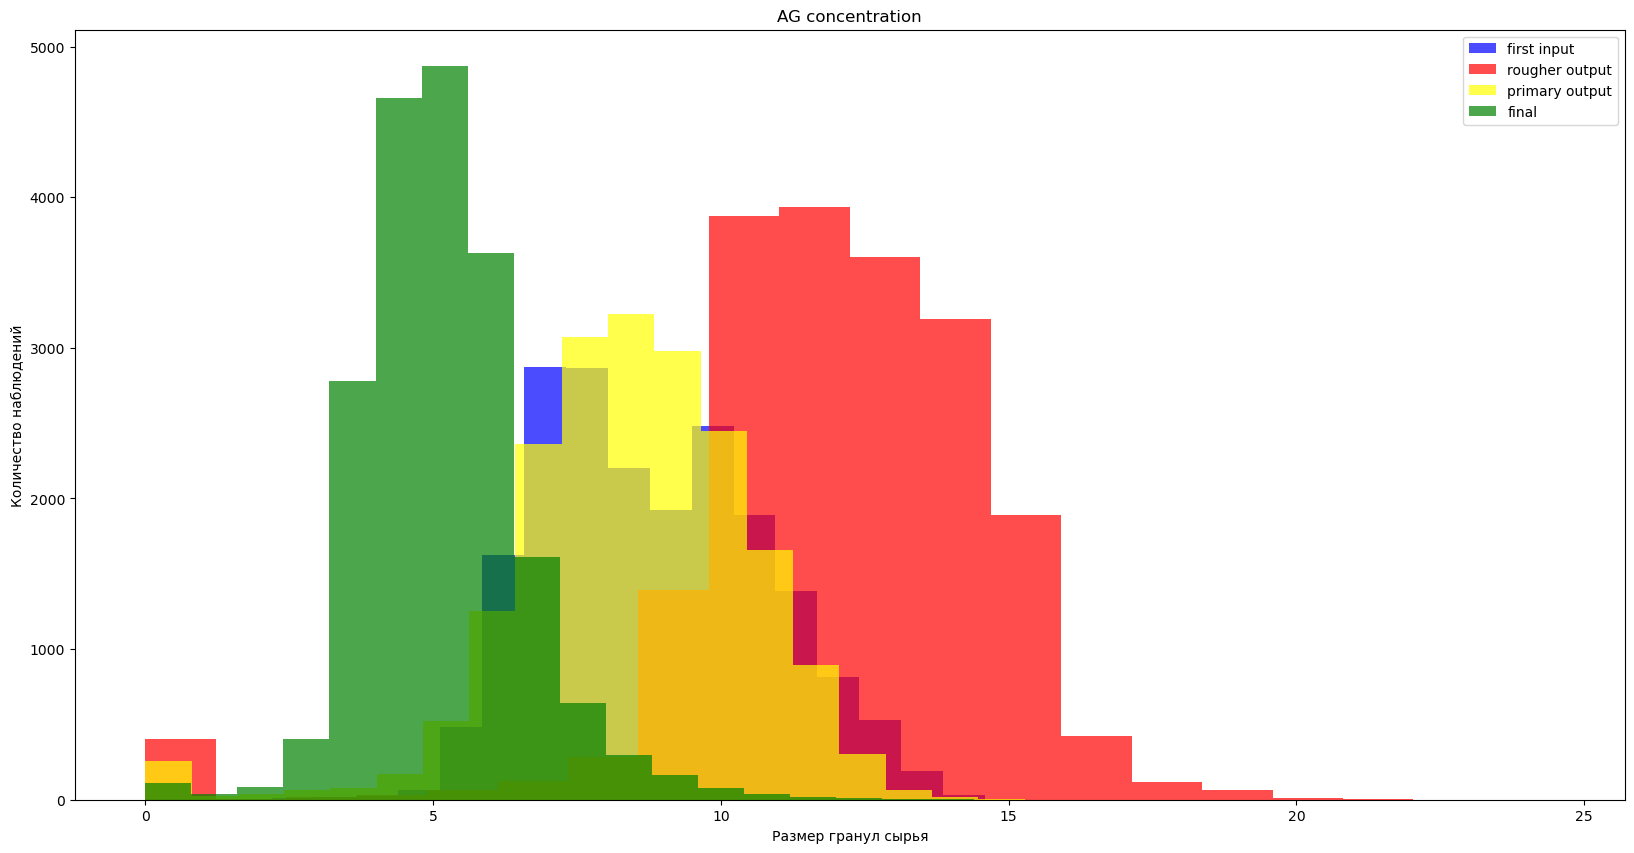

In [13]:
concentration('ag')

Да, только построив распределения, понял в чем проблема медиан в данном случае, спасибо!

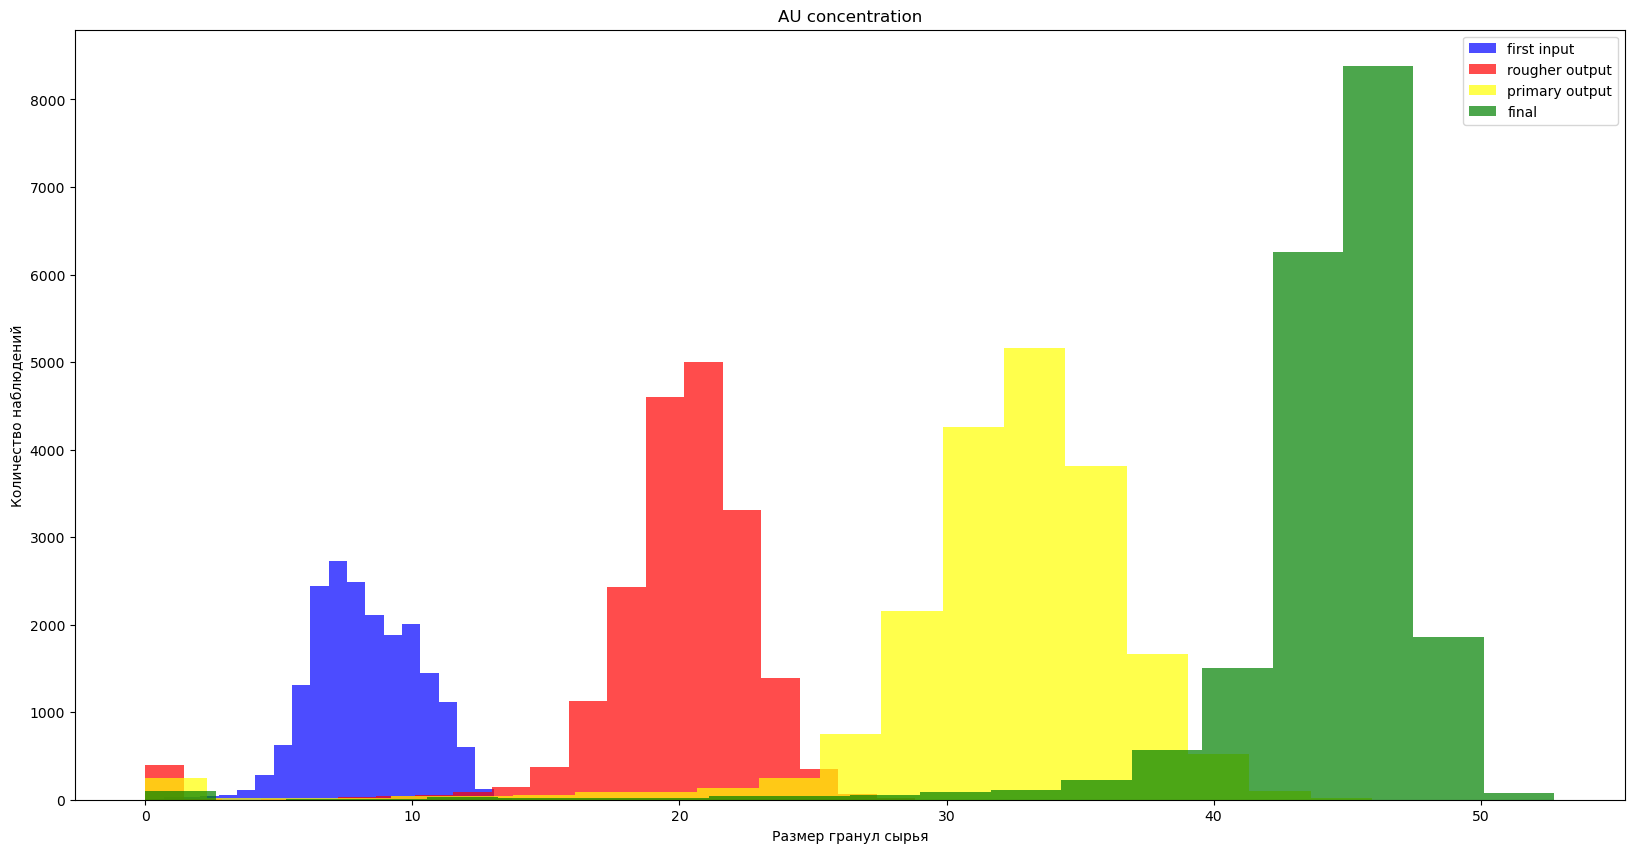

In [14]:
concentration('au')

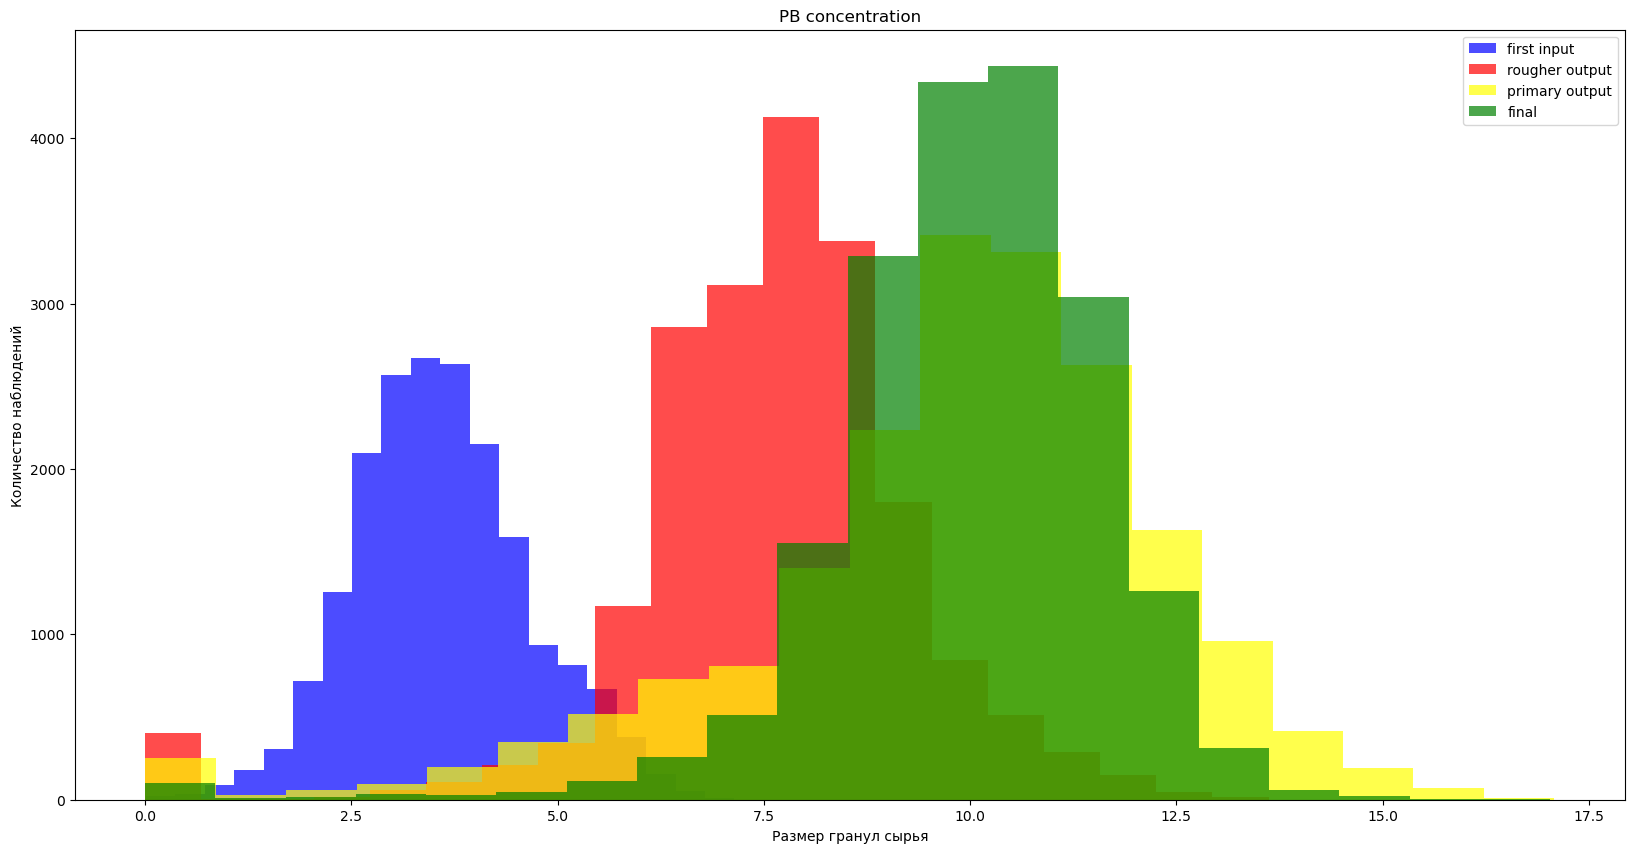

In [15]:
concentration('pb')

На графиках хорошо видны выводы:
* Серебро
    + С каждым этапов концентрация серебра становится меньше приблизительно на 3%. Его изначальная концентрация - 11.7%, финальная - 5%
* Золото
    + Контцентрация золота становится значительно больше на каждом из этапов.  Его изначальная концентрация - 20%, финальная - 45%
* Свинец
    + Так же на каждом этапе становится больше, но в меньших масштабах. Его изначальная концентрация - 7.7%, финальная - 10.2%

### Распределения размеров гранул сырья на обучающей и тестовой выборках

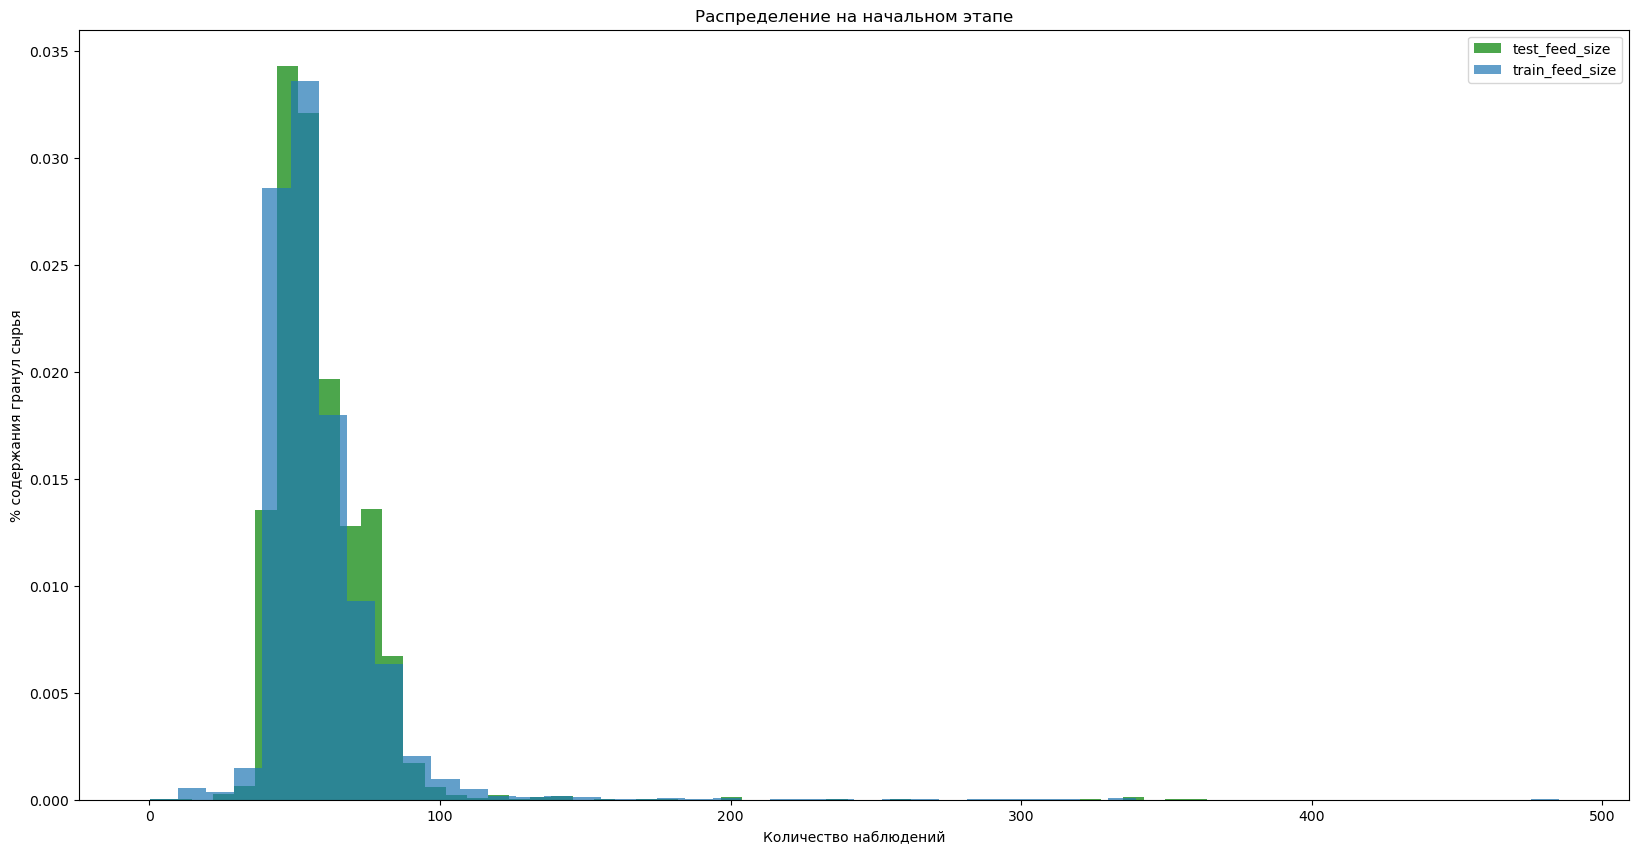

Распределение на тестовой выборке на начальном этапе:
count    4860.000000
mean       59.080175
std        19.441844
min         0.046369
25%        47.605339
50%        55.414175
75%        66.538910
max       363.989699
Name: rougher.input.feed_size, dtype: float64

Распределение на тренировочной выборке на начальном этапе:


count    14579.000000
mean        58.776732
std         23.144080
min          0.049194
25%         47.171414
50%         54.254915
75%         64.344760
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [18]:
test_size = gold_recovery_test_new['rougher.input.feed_size']
train_size = gold_recovery_train_new['rougher.input.feed_size']
plt.figure(figsize=(20, 10))
plt.hist(test_size, alpha=.7, label='test_feed_size', color = 'green', density = True, bins = 50)
plt.hist(train_size, alpha=.7, label = 'train_feed_size', density = True, bins = 50)
plt.legend(loc='upper right')
plt.title('Распределение на начальном этапе')
plt.xlabel('Количество наблюдений')
plt.ylabel('% содержания гранул сырья')
plt.show()
print("Распределение на тестовой выборке на начальном этапе:")
print(gold_recovery_test_new['rougher.input.feed_size'].describe())
print()
print('Распределение на тренировочной выборке на начальном этапе:')
gold_recovery_train_new['rougher.input.feed_size'].describe()

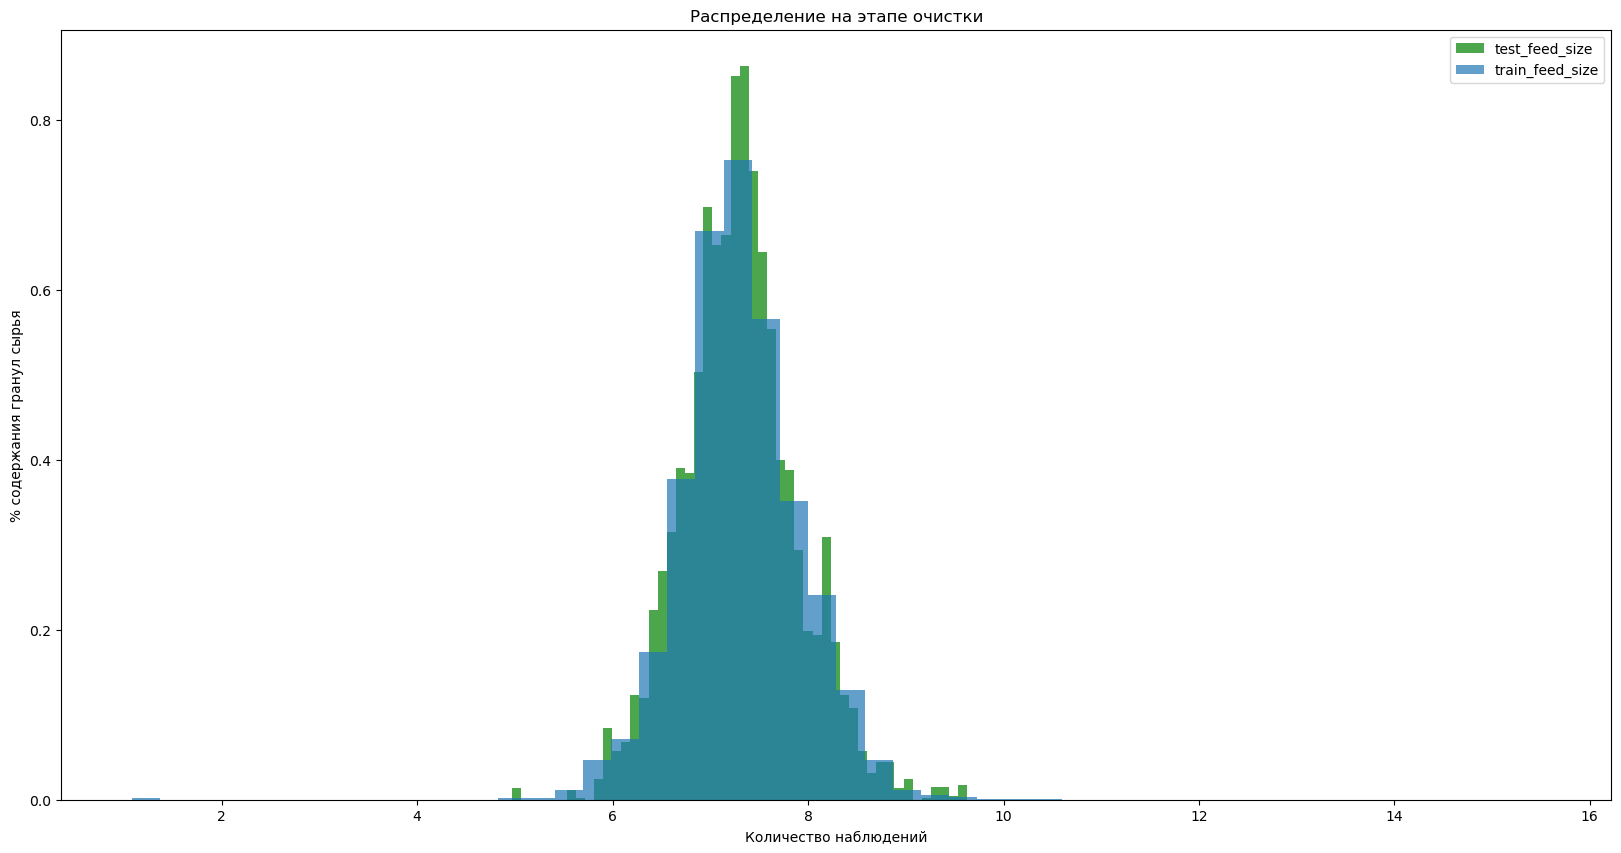

Распределение на тестовой выборке:
count    4860.000000
mean       59.080175
std        19.441844
min         0.046369
25%        47.605339
50%        55.414175
75%        66.538910
max       363.989699
Name: rougher.input.feed_size, dtype: float64

Распределение на тренировочной выборке:


count    14579.000000
mean        58.776732
std         23.144080
min          0.049194
25%         47.171414
50%         54.254915
75%         64.344760
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [19]:
test_size = gold_recovery_test_new['primary_cleaner.input.feed_size']
train_size = gold_recovery_train_new['primary_cleaner.input.feed_size']
plt.figure(figsize=(20, 10))
plt.hist(test_size, alpha=.7, label='test_feed_size', color = 'green', density = True, bins = 50)
plt.hist(train_size, alpha=.7, label = 'train_feed_size', density = True, bins = 50)
plt.legend(loc='upper right')
plt.title('Распределение на этапе очистки')
plt.xlabel('Количество наблюдений')
plt.ylabel('% содержания гранул сырья')
plt.show()
print("Распределение на тестовой выборке:")
print(gold_recovery_test_new['rougher.input.feed_size'].describe())
print()
print('Распределение на тренировочной выборке:')
gold_recovery_train_new['rougher.input.feed_size'].describe()

Распределения размеров гранул сырья на начальном этапе отличаются, разница у самых частых значений около 10% в сторону тестовой выборки, далее  примерно 2-ух перевес идет в сторону тренировочной выборки. Разница небольшая, она незначительно скажется на оценках модели. Распредения хорошо отображает график. <br><br>

Распределения на этапе очистки практически идентичны друг другу.

### Cуммарная концентрация всех веществ на разных стадиях

На данном этапе мы рассмотрим суммарную концентрацию четырех основных веществ на всех стадиях. Для этого мы создадим дополнительный столбец, где просуммируем их для каждой строки, а затем возьмем медианное значение для каждого этапа.

In [20]:
# считаем сумму всех элементов на каждом этапе

gold_recovery_full_new['sum_elements_rough'] = gold_recovery_full_new[['rougher.input.feed_ag', \
                'rougher.input.feed_au', 'rougher.input.feed_pb', 'rougher.input.feed_sol']].sum(axis=1)
gold_recovery_full_new['sum_elements_black'] = gold_recovery_full_new[['rougher.output.concentrate_ag', \
                'rougher.output.concentrate_pb', 'rougher.output.concentrate_au', \
                                                        'rougher.output.concentrate_sol']].sum(axis=1)
gold_recovery_full_new['sum_elements_final'] = gold_recovery_full_new[['final.output.concentrate_ag',\
                'final.output.concentrate_pb', 'final.output.concentrate_au', \
                                                                       'final.output.concentrate_sol']].sum(axis=1) 


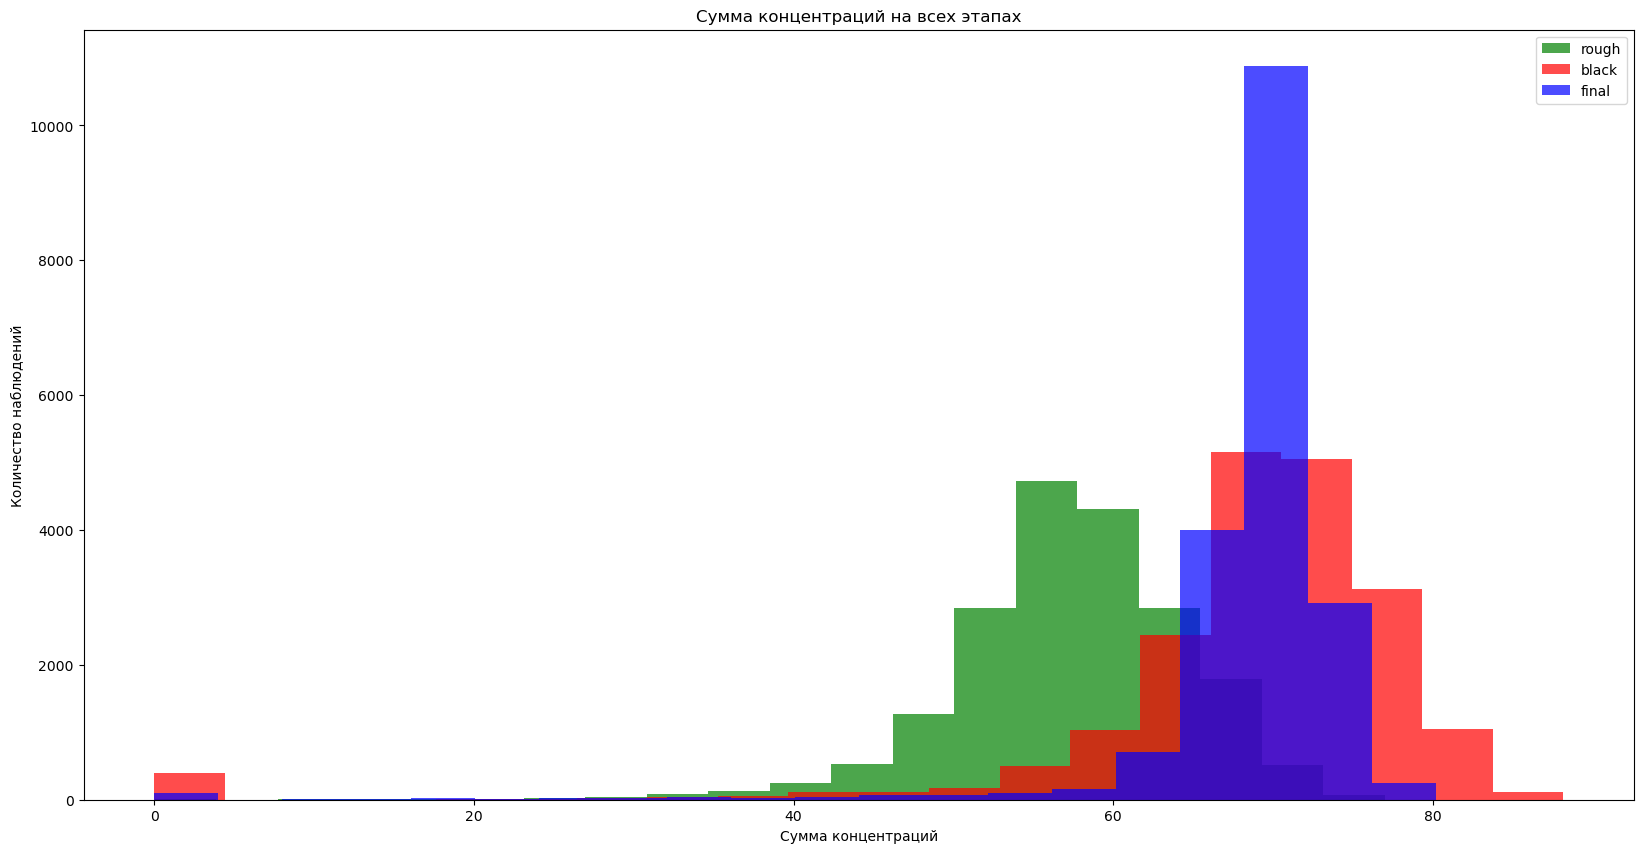

In [22]:
plt.figure(figsize=(20, 10))
plt.hist(gold_recovery_full_new['sum_elements_rough'], alpha=.7, label='rough',
         color = 'green', bins = 20)
plt.hist(gold_recovery_full_new['sum_elements_black'], alpha=.7, label='black',
         color = 'red', bins = 20)
plt.hist(gold_recovery_full_new['sum_elements_final'], alpha=.7, label='final',
         color = 'blue', bins = 20)
plt.title('Cумма концентраций на всех этапах')
plt.xlabel('Сумма концентраций')
plt.ylabel('Количество наблюдений')
plt.legend(loc='upper right')
plt.show()

In [20]:
# оставляем те строки, где ненулевая концентрация

gold_recovery_full_new = gold_recovery_full_new.loc[gold_recovery_full_new['sum_elements_final'] != 0]
gold_recovery_full_new = gold_recovery_full_new.loc[gold_recovery_full_new['sum_elements_black'] != 0]
gold_recovery_full_new = gold_recovery_full_new.loc[gold_recovery_full_new['sum_elements_rough'] != 0]

# синхронизируем с другими датасетами
gold_recovery_train_new = gold_recovery_train_new.loc\
[gold_recovery_train_new[['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb',\
                         'rougher.output.concentrate_au','rougher.output.concentrate_sol']].sum(axis=1) != 0]
gold_recovery_train_new = gold_recovery_train_new.loc\
[gold_recovery_train_new[['rougher.input.feed_ag', 'rougher.input.feed_au',\
                          'rougher.input.feed_pb', 'rougher.input.feed_sol']].sum(axis=1) != 0]
gold_recovery_train_new = gold_recovery_train_new.loc\
[gold_recovery_train_new[['final.output.concentrate_ag','final.output.concentrate_pb',\
                          'final.output.concentrate_au','final.output.concentrate_sol']].sum(axis=1) != 0]

gold_recovery_test_new = gold_recovery_test_new[gold_recovery_test_new.index.isin(gold_recovery_full_new.index)]

График отображает, что cуммарная концентрация веществ становится больше с каждым последующим этапом. На финальном этапе распредение сужается к наиболее частым значениям чернового этапа. <br><br>
В суммарном распределние заметны нулевые суммарные концентрации, что является аномальными значениями и их необходимо удалить. Это можно сделать, так как они составляют приблизительно 3% от общего числа строк. Для этого мы удаляем их из полной и тренировочной выборок, затем оставляем в тестовой выборке только те значения, которые остались в полной.

## Модель

На данном этапе мы рассмотрим три регрессивных модели: решающего дерева, случайного леса и линейную регрессию; и выберем наиболее подходящую из них. В процессе мы будем использовать кросс-валидацию. Для ее оценкой мы будет использовать метрику sMAPE, которую мы считаем в функции. 

### Выбор модели для чернового концентрата

Для начала обозначим целевую переменную и признаки для обучения. Все это берем из тренировочного датасета. В признаки мы не добавляем те данные, которые становятся известны только после всех этапов обработки, берем только 'input' и 'state'.

In [21]:
# отбираем колонки для чернового концентрата
cols = [i for i in gold_recovery_train_new.columns if 'rougher.input' in i or 'rougher.state' in i]

# выделяем таргет
rough_features_train = gold_recovery_train_new.loc[:, cols]
rough_target_train = gold_recovery_train_new['rougher.output.recovery']


In [22]:
# отбираем финальный концентрат
final_target_train = gold_recovery_train_new['final.output.recovery']
cols = [i for i in gold_recovery_train_new.columns if 'output' not in i and 'calculation' not in i \
       and 'element' not in i]
final_features_train = gold_recovery_train_new.loc[:, cols]


Далее создаем два списка, чтобы сохранять результаты метрики __sMAPE__.

In [23]:
# создаем списки для сохранения результатов
smape_r_scores = []
smape_f_scores = []

In [24]:
%%time
# создаем scorer для моделей
smape_score = make_scorer(smape, greater_is_better = False)
params_dt = {'max_depth' : range(2, 7),
            'min_samples_leaf': [ 6, 8, 2, 4]}

# подбираем гиперпараметры для DecisionTreeRegressor
cv_rougher_dt = GridSearchCV(DecisionTreeRegressor(random_state = 12345), params_dt, cv = 8, scoring = smape_score)
cv_rougher_dt = cv_rougher_dt.fit(rough_features_train, rough_target_train)

# сохраняем лучший результат
smape_r_scores.append(cv_rougher_dt.best_score_)
parameters_dt = cv_rougher_dt.best_params_

CPU times: user 17.8 s, sys: 3.69 ms, total: 17.8 s
Wall time: 53.6 s


Параллельно кросс-валидации мы подбираем лучшие гиперпараметры для нашей модели.

In [25]:
%%time

params_rf = {'max_depth' : range(4, 7, 2),
            'n_estimators': range(65, 96, 15),
            'min_samples_leaf': [2, 4],
            'n_jobs' : [-1]}

# подбираем гиперпараметры для RandomForestRegressor
cv_rougher_rf = GridSearchCV(RandomForestRegressor(random_state = 12345), params_rf, cv = 8, scoring = smape_score )
cv_rougher_rf = cv_rougher_rf.fit(rough_features_train, rough_target_train)

# сохраняем лучший результат
smape_r_scores.append(cv_rougher_rf.best_score_)
parameters_rf = cv_rougher_rf.best_params_

CPU times: user 10min 1s, sys: 819 ms, total: 10min 2s
Wall time: 16min 35s


In [26]:
%%time

params_ln = {'n_jobs' : [-1]}

#проверяем LinearRegression
cv_rougher_lr = GridSearchCV(LinearRegression(), params_ln, cv = 8, scoring = smape_score )
cv_rougher_lr = cv_rougher_lr.fit(rough_features_train, rough_target_train)

# сохраняем лучший результат
smape_r_scores.append(cv_rougher_lr.best_score_)
parametrs_lr = cv_rougher_lr.best_params_

CPU times: user 732 ms, sys: 999 ms, total: 1.73 s
Wall time: 1.72 s


In [27]:
params_d = {'strategy' : ['mean', 'median']}

# создаем Dummy-модель
cv_rougher_d = GridSearchCV(DummyRegressor(), params_d, cv = 8, scoring = smape_score )
cv_rougher_d = cv_rougher_d.fit(rough_features_train, rough_target_train)

# добавляем ее результат
smape_r_scores.append(cv_rougher_d.best_score_)
parametrs_d = cv_rougher_d.best_params_

Далее из-за особенностей GridSearchCV, мы умножаем каждый результат на -1, и строим таблицу для наглядных выводов.

Лучшие параметры для Decision Tree {'max_depth': 6, 'min_samples_leaf': 8}
Лучшие параметры для Random Forest- {'max_depth': 6, 'min_samples_leaf': 2, 'n_estimators': 95, 'n_jobs': -1}
Лучшие параметры для Linerear Regression {'n_jobs': -1}
Лучшие параметры для Dummy {'strategy': 'mean'}

Значение sMAPE для DecisionTree = 0.06958228484137306
Значение sMAPE для Random Forest = 0.06587803795594956
Значение sMAPE для Linerear Regression = 0.0617586023292233
Значение sMAPE для Dummy = 0.07825183390142007


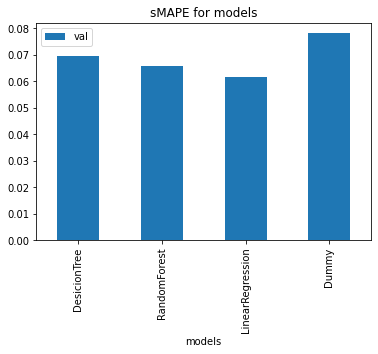

In [28]:
# умножаем все результаты на -1
smape_r_scores_new = []
for i in smape_r_scores:
    i = i * -1
    smape_r_scores_new.append(i)

# строим графики с результатами     
models = ['DesicionTree', 'RandomForest', 'LinearRegression', 'Dummy']
d = {'models' : models, 'val' : smape_r_scores_new}
df = pd.DataFrame(d)
df.plot.bar(x='models', y='val', title = 'sMAPE for models')
print('Лучшие параметры для Decision Tree', parameters_dt)
print('Лучшие параметры для Random Forest-', parameters_rf)
print('Лучшие параметры для Linerear Regression', parametrs_lr)
print('Лучшие параметры для Dummy', parametrs_d)
print()
print('Значение sMAPE для DecisionTree =', smape_r_scores_new[0])
print('Значение sMAPE для Random Forest =', smape_r_scores_new[1])
print('Значение sMAPE для Linerear Regression =', smape_r_scores_new[2])
print('Значение sMAPE для Dummy =', smape_r_scores_new[3])

Лучшее значение дает модель линейной регрессии, берем ее для дальшейших действий.

### Выбор модели для финального концентрата

Такой же ход действий и с моделью для финального концентрата

In [29]:
%%time

params_dt = {'max_depth' : range(2, 7),
            'min_samples_leaf': [ 6, 8, 2, 4]}

# подбираем гиперпараметры для DecisionTreeRegressor
cv_final_dt = GridSearchCV(DecisionTreeRegressor(random_state = 12345), params_dt, cv = 8, scoring = smape_score )
cv_final_dt = cv_final_dt.fit(final_features_train, final_target_train)

# добавляем лучший результат
smape_f_scores.append(cv_final_dt.best_score_)
parametrs_dt = cv_final_dt.best_params_

CPU times: user 40.2 s, sys: 41.4 ms, total: 40.2 s
Wall time: 40.4 s


In [30]:
%%time

params_lr = {'n_jobs' : [-1]}

# подбираем гиперпараметры для LinearRegression
cv_final_lr = GridSearchCV(LinearRegression(), params_lr, cv = 8, scoring = smape_score )
cv_final_lr = cv_final_lr.fit(final_features_train, final_target_train)

# добавляем лучший результат
smape_f_scores.append(cv_final_lr.best_score_)
parametrs_lr = cv_final_lr.best_params_

CPU times: user 1.28 s, sys: 1.78 s, total: 3.06 s
Wall time: 3.04 s


In [31]:
%%time

params_rf = {'max_depth' : range(4, 7, 2),
            'n_estimators': range(65, 96, 15),
            'min_samples_leaf': [2, 4],
            'n_jobs' : [-1]}

# подбираем гиперпараметры для RandomForestRegressor
cv_final_rf = GridSearchCV(RandomForestRegressor(random_state = 12345), params_rf, cv = 8, scoring = smape_score )
cv_final_rf = cv_final_rf.fit(final_features_train, final_target_train)

# добавляем лучший результат
smape_f_scores.append(cv_final_rf.best_score_)
parametrs_rf = cv_final_rf.best_params_

CPU times: user 24min 15s, sys: 1.7 s, total: 24min 16s
Wall time: 25min 50s


In [32]:
params_d = {'strategy' : ['mean', 'median']}

# проверяем Dummy-модель
cv_final_d = GridSearchCV(DummyRegressor(), params_d, cv = 8, scoring = smape_score )
cv_final_d = cv_final_d.fit(final_features_train, final_target_train)
smape_f_scores.append(cv_final_d.best_score_)
parametrs_d = cv_final_d.best_params_

Лучшие параметры для Decision Tree {'max_depth': 6, 'min_samples_leaf': 8}
Лучшие параметры для Random Forest- {'max_depth': 6, 'min_samples_leaf': 2, 'n_estimators': 95, 'n_jobs': -1}
Лучшие параметры для Linerear Regression {'n_jobs': -1}
Лучшие параметры для Dummy {'strategy': 'median'}

Значение sMAPE для DecisionTree = 0.09403427072158946
Значение sMAPE для Random Forest = 0.10907165862114354
Значение sMAPE для Linerear Regression = 0.0910190911078188
Значение sMAPE для Dummy = 0.10456452180369866


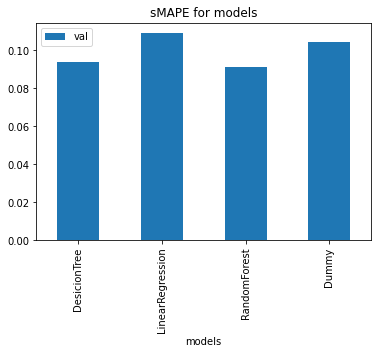

In [33]:
# умножаем результат на -1

smape_f_scores_new = []
for i in smape_f_scores:
    i = i * -1
    smape_f_scores_new.append(i)

# строим график с результатами
models = ['DesicionTree','LinearRegression', 'RandomForest', 'Dummy']
d = {'models' : models, 'val' : smape_f_scores_new}
df = pd.DataFrame(d)
df.plot.bar(x='models', y='val', title = 'sMAPE for models')
print('Лучшие параметры для Decision Tree', parameters_dt)
print('Лучшие параметры для Random Forest-', parameters_rf)
print('Лучшие параметры для Linerear Regression', parametrs_lr)
print('Лучшие параметры для Dummy', parametrs_d)
print()
print('Значение sMAPE для DecisionTree =', smape_f_scores_new[0])
print('Значение sMAPE для Random Forest =', smape_f_scores_new[1])
print('Значение sMAPE для Linerear Regression =', smape_f_scores_new[2])
print('Значение sMAPE для Dummy =', smape_f_scores_new[3])

Лучший результат показала модель случайного леса.

### Прогнозирование эффективности

Теперь выделяем признаки и таргет для двух этапов. Для поиска таргета ищем совпадение с полным датасетом по индексам.

In [34]:
# фильтруем данные для теста
cols = [i for i in gold_recovery_test_new.columns if 'rougher.input' in i or 'rougher.state' in i]

# синхронизуем и выделяем таргет
rough_features_test = gold_recovery_test_new.loc[:, cols]
rough_test_target = gold_recovery_full_new.iloc\
    [gold_recovery_full_new.index.isin(gold_recovery_test_new.index)]['rougher.output.recovery']
final_test_target = gold_recovery_full_new.iloc\
    [gold_recovery_full_new.index.isin(gold_recovery_test_new.index)]['final.output.recovery']

Подсчитываем __sMAPE__ на тестовой выборке

In [35]:
# получаем предсказания для чернового концентрата
cv_rougher_lr_pred = cv_rougher_lr.predict(rough_features_test)

# считаем smape 
rough_smape = smape(rough_test_target, cv_rougher_lr_pred)
rough_smape

0.04536191791468515

In [36]:
# получаем предсказания для финального концентрата
cv_final_rf_pred = cv_final_rf.predict(gold_recovery_test_new)
final_smape = smape(final_test_target, cv_final_rf_pred)
final_smape

0.08184351198173959

### Итоговый sMAPE

In [37]:
summary_smape = itog_smape(rough_smape, final_smape)
print('Итоговый sMAPE =', summary_smape.round(3))

Итоговый sMAPE = 0.073


Итоговый sMAPE получился = 0.07 , это значит, что наши предсказания отличаются на 7% от правильного результата, а это хороший результат!

## Вывод

В данном исследовании мы построили модель для предсказания эффективности технологического процесса золотообработки. <br><br>
Наше исследование состояло из следующих этапов:
- __Подготовка данных__
    + Мы загрузили и изучили файлы
    + Проверили корректность расчета эффективности обогащения
    + Проанализировали недоступные в тестовой выборке признаки
    + И провели предобработку данных, заполнив пропуски, проверив дубликаты и поменяв индексы
- __Анализ данных__
    + Концентрация металлов на разных этапах очистки
        - Серебро. С каждым этапов концентрация серебра становится меньше приблизительно на 3%. Его изначальная концентрация - 11.7%, финальная - 5%
        - Золото. Контцентрация золота становится значительно больше на каждом из этапов.  Его изначальная концентрация - 20%, финальная - 45%
        - Свинец. Так же на каждом этапе становится больше, но в меньших масштабах. Его изначальная концентрация - 7.7%, финальная - 10.2%
    + Распределения размеров гранул сырья на обучающей и тестовой выборках
        - Распределения размеров гранул сырья на начальном этапе отличаются, разница у самых частых значений около 10% в сторону тестовой выборки, далее  примерно 2-ух перевес идет в сторону тренировочной выборки. Разница небольшая, она незначительно скажется на оценках модели. Распредения хорошо отображает график. Распределения на этапе очистки идентичны друг другу
    + Cуммарная концентрация всех веществ на разных стадиях
        - График отображает, что cуммарная концентрация веществ становится больше с каждым последующим этапом. На финальном этапе распредение сужается к наиболее частым значениям чернового этапа. В суммарном распределние заметны нулевые суммарные концентрации, что является аномальными значениями и их необходимо удалить. Это можно сделать, так как они составляют приблизительно 3% от общего числа строк.Для этого мы удаляем их из полной и тренировочной выборок, затем оставляем в тестовой выборке только те значения, которые остались в полной.
- __Модель__
    + Выбор модели для чернового концентрата
        - Лучшей оказалась модель линейной регрессии.
    + Выбор модели для финального концентрата
        - Лучшей оказалась модель случайного леса
    + Подсчет sMAPE
        - Итоговый sMAPE равен 0.07. Это значит, что наши предсказания отличаются на 7% от правильного результата, а это хороший результат!
Нами была построена модель для предсказания эффективности золотообогащения с симметричным средним абсолютным отклонением равным 
    